In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [137]:
dataset=pd.read_csv("Salaries.csv")

In [138]:
dataset.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


In [139]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [171]:
dataset.describe(include='all')

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397,397,397.000000,397.000000,397,397.000000
unique,3,2,NaN,NaN,2,NaN
top,Prof,B,NaN,NaN,Male,NaN
freq,266,216,NaN,NaN,358,NaN
mean,NaN,NaN,22.314861,17.614610,NaN,113706.458438
std,NaN,NaN,12.887003,13.006024,NaN,30289.038695
min,NaN,NaN,1.000000,0.000000,NaN,57800.000000
25%,NaN,NaN,12.000000,7.000000,NaN,91000.000000
50%,NaN,NaN,21.000000,16.000000,NaN,107300.000000
75%,NaN,NaN,32.000000,27.000000,NaN,134185.000000


In [203]:
dataset['rank']=dataset['rank'].astype(str)

In [205]:
dataset['discipline']=dataset['discipline'].astype(str)

In [206]:
dataset['sex']=dataset['sex'].astype(str)

In [208]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 37.9+ KB


# Cleaning Data

In [172]:
backup=dataset.copy()

In [143]:
import seaborn as sns


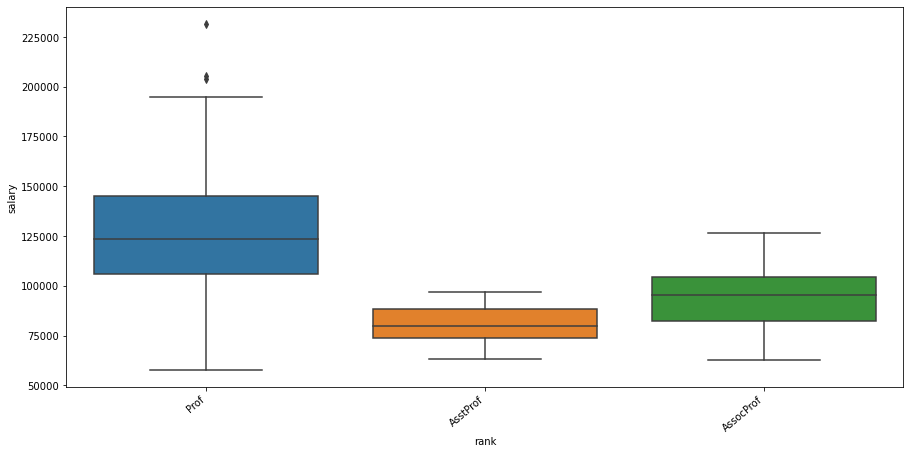

In [144]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='rank',y='salary',data=dataset)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

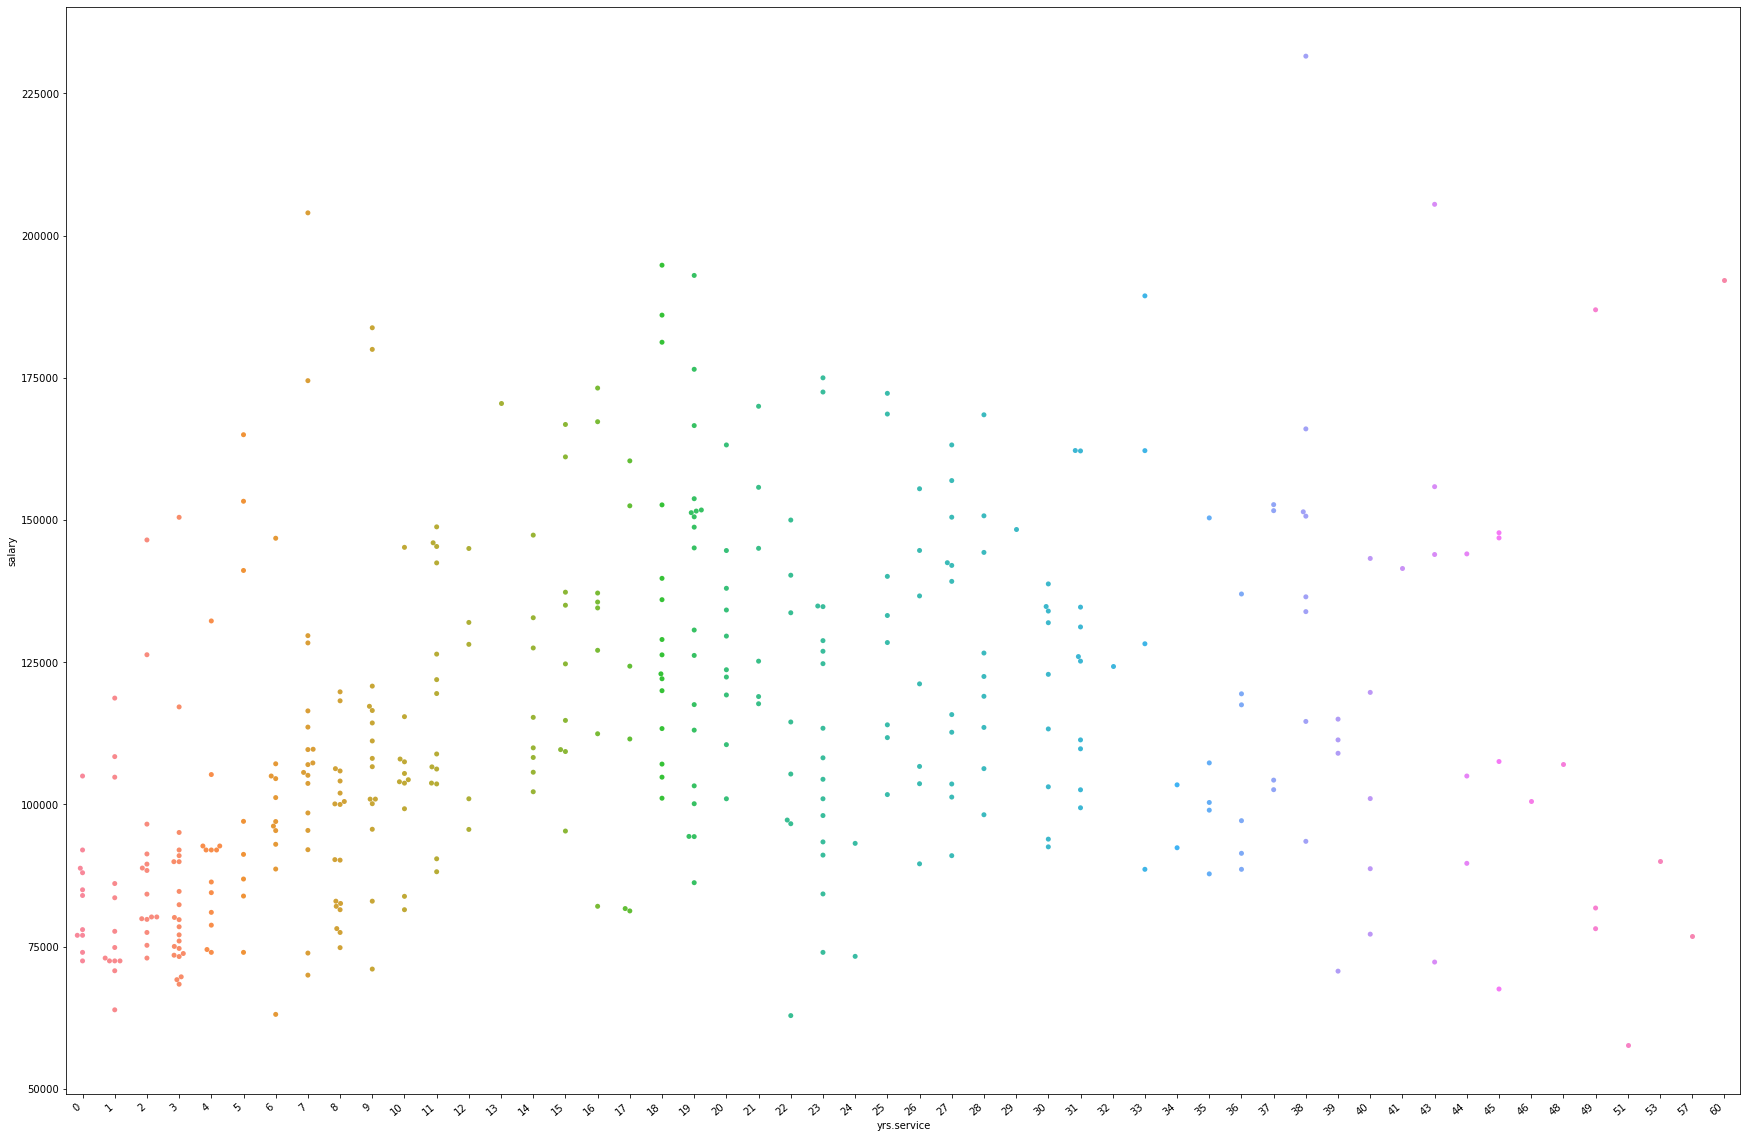

In [148]:
plt.subplots(figsize=(30,20))
ax=sns.swarmplot(x='yrs.service',y='salary',data=dataset)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

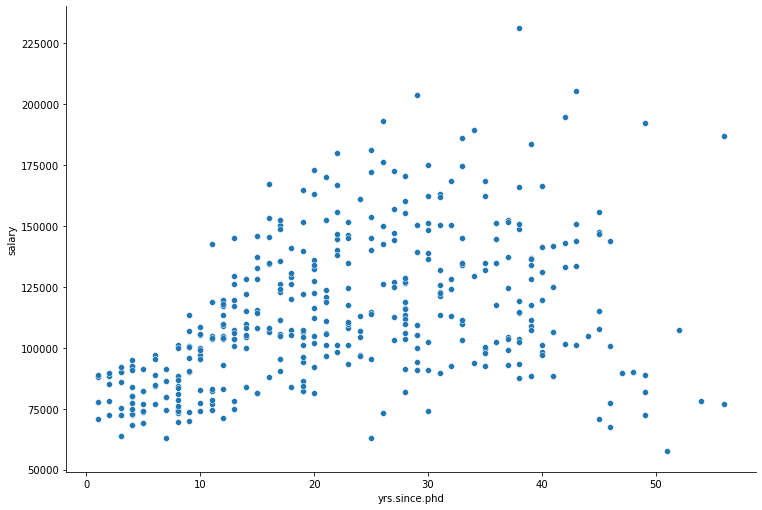

In [151]:
sns.relplot(x='yrs.since.phd',y='salary',data=dataset,height=7,aspect=1.5)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

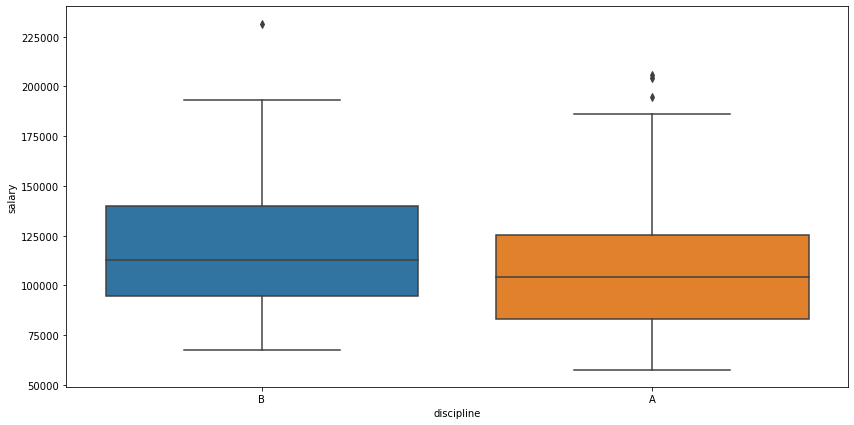

In [152]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='discipline',y='salary',data=dataset)

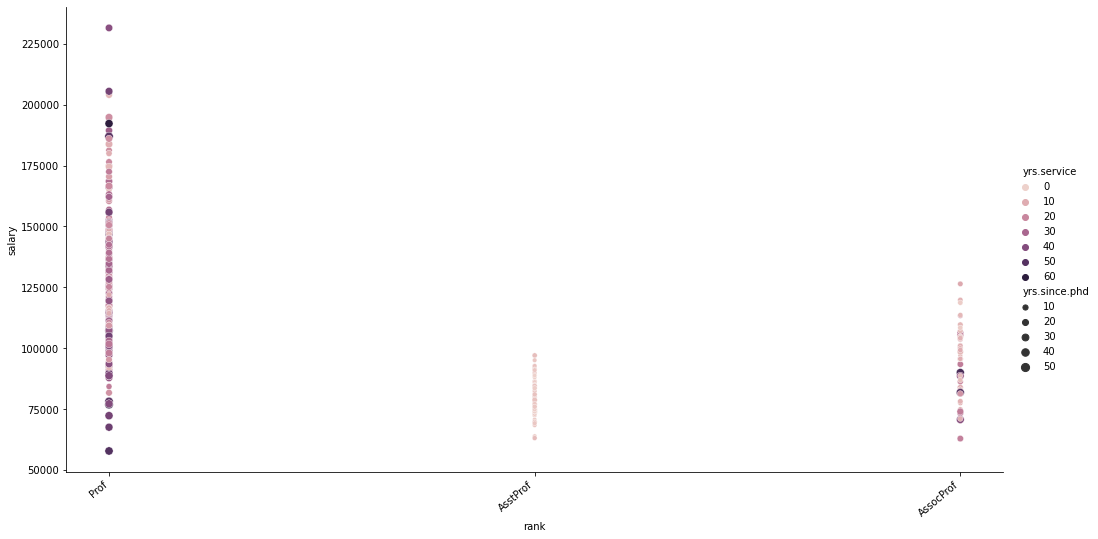

In [155]:
ax=sns.relplot(x='rank',y='salary',data=dataset,hue='yrs.service',size='yrs.since.phd',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [219]:
X=dataset[['yrs.since.phd','yrs.service']]
y=dataset['salary']

In [221]:
X

,yrs.since.phd,yrs.service
0,19,18
1,20,16
2,4,3
3,45,39
4,40,41
...,...,...
392,33,30
393,31,19
394,42,25
395,25,15


In [222]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [223]:
y.shape

(397,)

# Applying Train Test Split

In [224]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [225]:
from sklearn.linear_model import LinearRegression

In [226]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Creating an OneHotEncoder object to contain all the possible categories

In [229]:
ohe=OneHotEncoder()
ohe.fit(X[['yrs.since.phd','yrs.service']])

OneHotEncoder()

# Creating a column transformer to transform categorical columns

In [230]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['yrs.since.phd','yrs.service']),
                                    remainder='passthrough')


# Linear Regression Model

In [231]:
lr=LinearRegression()

# Making a pipeline


In [232]:
pipe=make_pipeline(column_trans,lr)


# Fitting the model


In [233]:
pipe.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52,
       54, 56], dtype=int64),
                                                                            array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 48, 49, 51, 53, 57,
       60], dtype=int64)]),
                                                  ['yrs.since.phd',
                                                   'yrs.service'])])),
                ('linearregression',

In [234]:
y_pred=pipe.predict(X_test)


In [235]:
r2_score(y_test,y_pred)

0.06967120903410484

# Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score


In [236]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [237]:
np.argmax(scores)


6

In [244]:
scores[np.argmax(scores)]


0.5660798365545234

In [246]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.5660798365545234

In [247]:
import pickle


In [248]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))


In [249]:
pipe.steps[0][1].transformers[0][1].categories[0]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52,
       54, 56], dtype=int64)